# 8절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris_df = datasets.get_rdataset("iris",package="datasets").data #.data 있는 데이터셋 0->pandas의 데이터프레임 으로 변환
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 8.1 Group by

In [2]:
iris_df.groupby(iris_df.Species)['Sepal.Length'].sum()

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

- 기본적으로 mean

In [3]:
iris_df.pivot_table(index='Species', 
                    values=['Sepal.Length'],
                    aggfunc='sum')       

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


- sum으로 정하고 싶다

In [4]:
iris_df.pivot_table(index='Species', 
                values=['Sepal.Length'],
                   aggfunc='sum')

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


- pivot table  두 개 동시에 분석해야하는데, 두개의 구조가 달라 

In [5]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped

In [6]:
iris_grouped['Sepal.Length'].count()

Species
setosa        50
versicolor    50
virginica     50
Name: Sepal.Length, dtype: int64

- 결측치 넣기

In [ ]:
iris_df.loc[1,'Sepal.Length'] = np.nan     

In [ ]:
import random
rownum = random.sample(range(len(iris_df)),4)   #range(len(iris_df))  0-149  중 4개의 수
rownum

- 임의의 4개의 값이 들어가 있다 

In [ ]:
for row in rownum: 
    iris_df.loc[row,'Sepal.Length']=np.nan    #임의의 4개의 값이 들어가 있다 

In [ ]:
iris_df.loc[rownum,'Sepal.Length']

In [ ]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

**다중 열로 그룹화**

In [ ]:
iris_df.groupby([iris.df["Species"],iris_df["Sepal.Length"]])


In [ ]:
iris_df.groupby([iris.df["Species"],iris_df["Sepal.Length"]]).mean().head()

In [ ]:
iris_df.groupby([iris.df["Species"],iris_df["Sepal.Length"]]).describe()

- 도표

In [13]:
g=iris_df.groupby(iris_df.Species).mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


- 시각화


<AxesSubplot:xlabel='Species'>

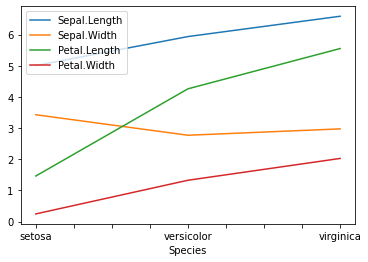

In [7]:
iris_df.groupby(iris_df.Species).mean().plot()

- 시각화 (bar graph)

<AxesSubplot:xlabel='Species'>

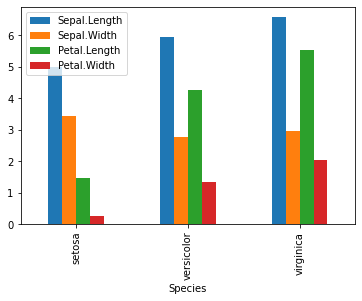

In [8]:
iris_df.groupby(iris_df.Species).mean().plot(kind='bar')

밑 글 rot=0

<AxesSubplot:xlabel='Species'>

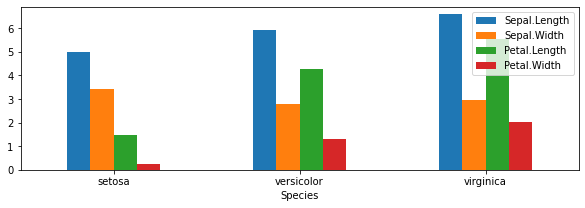

In [14]:
g.plot(kind='bar',rot=0,figsize=(10,3))

- 범례를 밖으로 빼기
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
- **Put the legend out of the figure**
<br>**plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)**

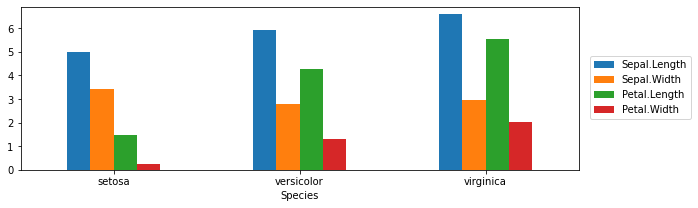

In [17]:
import matplotlib.pyplot as plt
g.plot(kind='bar',rot=0,figsize=(10,3))
plt.legend(bbox_to_anchor=(1.02, 0.7), loc=2, borderaxespad=0.) #범례를 밖으로 빼기   

- describe(): 요약 통계량 

In [25]:
iris_df.groupby(iris_df.Species).describe().T  #.T 가로가 세로로

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

(2) 다중열로 그룹화

In [21]:
g=iris_df.groupby([iris_df['Species'], iris_df['Petal.Width']]).mean()  #왼쪽에 Species   Petal.Width
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [22]:
g.unstack()

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.972414  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

- .T  가로가 세로로

In [26]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.972414         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

- boxplot

<AxesSubplot:>

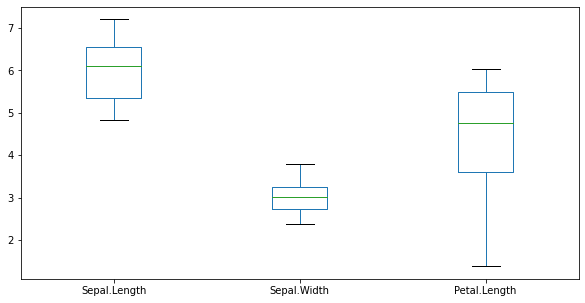

In [28]:
g.plot.box(figsize=(10,5))

- unstack() 가독성을 위해 

In [103]:
g=iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]) ['Sepal.Length'].mean()
g

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.972414
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            6.866667
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [33]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.972414         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

- 열 전체 출력 max_columns

In [39]:
import pandas as pd
pd.options.display.max_columns

22

In [40]:
pd.options.display.max_columns=22

In [104]:
g.unstack()  

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,6.357143,6.19,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,6.15,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [105]:
g.unstack().T 

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.972414,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## 8.2 그룹간 반복처리

In [ ]:
# 그룹화한 결과를 보는게 목적

In [42]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group 

In [45]:
for idx, grouped in enumerate(iris_group):     #첫번째, 두번째 ...로 나타나기 위해 enumerate
    print(idx,'번째 그룹은 ')   #0번째방  그룹명, 1번방 데이터     튜플
    print(grouped)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


0 번째 그룹은 
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14  

In [48]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ', species_name)
    print(type(grouped))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    

0 번째 그룹은  setosa
<class 'tuple'>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 번째 그룹은  versicolor
<class 'tuple'>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 번째 그룹은  virginica
<class 'tuple'>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


- sample()사용 

In [49]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ', species_name)
    print(group.sample(5))     #몇개 sample로 출력하라  #random하게 출력 
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

0 번째 그룹은  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
46           5.1          3.8           1.6          0.2  setosa
20           5.4          3.4           1.7          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa
19           5.1          3.8           1.5          0.3  setosa
25           5.0          3.0           1.6          0.2  setosa
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 번째 그룹은  versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
63           6.1          2.9           4.7          1.4  versicolor
96           5.7          2.9           4.2          1.3  versicolor
57           4.9          2.4           3.3          1.0  versicolor
76           6.8          2.8           4.8          1.4  versicolor
99           5.7          2.8           4.1          1.3  versicolor
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 번째 그룹은  virginica
     Sepal.Length  Sepal.Width  Petal.Length  

- sample() , sort_index()      index순으로 정렬

In [51]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ', species_name)
    print(group.sample(5).sort_index())     #몇개 sample로 출력하라  #random하게 출력 
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

0 번째 그룹은  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
3            4.6          3.1           1.5          0.2  setosa
10           5.4          3.7           1.5          0.2  setosa
16           5.4          3.9           1.3          0.4  setosa
29           4.7          3.2           1.6          0.2  setosa
45           4.8          3.0           1.4          0.3  setosa
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 번째 그룹은  versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
53           5.5          2.3           4.0          1.3  versicolor
63           6.1          2.9           4.7          1.4  versicolor
70           5.9          3.2           4.8          1.8  versicolor
81           5.5          2.4           3.7          1.0  versicolor
89           5.5          2.5           4.0          1.3  versicolor
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 번째 그룹은  virginica
     Sepal.Length  Sepal.Width  Petal.Length  

## 8.3 데이터 프레임 그룹 인덱싱

- **층별  샘플링(stratified sampling): <br>stratified sampling is a method of sampling from a population which can be partitioned into subpopulations.**
- **take ()**  
- iris_df.groupby(iris_df.Species).take([0,1,2]) # 각 종별 1,11,21,31번째 가져오기

In [57]:
#for idx, (species_name, group) in enumerate(iris_group):
#    print(idx,'번째 그룹은 ', species_name)
#    print(group.iloc[[1,11],:])   #datagrame group indexing
#    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
t=iris_df.groupby(iris_df.Species).take([0,1,2]) # 각 종별 1,11,21,31번째 가져오기
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     0             5.1          3.5           1.4          0.2
           1             4.9          3.0           1.4          0.2
           2             4.7          3.2           1.3          0.2
versicolor 50            7.0          3.2           4.7          1.4
           51            6.4          3.2           4.5          1.5
           52            6.9          3.1           4.9          1.5
virginica  100           6.3          3.3           6.0          2.5
           101           5.8          2.7           5.1          1.9
           102           7.1          3.0           5.9          2.1

In [58]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


## 8.4 레이블 (원핫인코딩 One-Hot Encoding)
- One-Hot Encoding: 데이터를 수많은 0과 한개의 1의 값으로 데이터를 구별하는 인코딩


In [60]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
iris_df.Species.describe()

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

- **레이블을 지원하는 패키지 이용**

## 8.5 문자를 숫자로 전환 **fit_transform()**

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(iris_df['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 문자가 숫자로 변환됨  (#컬럼 하나를 추가함)

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species'] =le.fit_transform(iris_df['Species'])
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9절. 데이터 구조 변경

## 9.1 와이드 포맷 vs. 롱포맷

판다스 공식 문서에 나오는 melt:
https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
<br> [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf) 7page

In [66]:
import statsmodels.api as sm
airquality_data = sm.datasets.get_rdataset("airquality",package="datasets") #package생략시 datasets
airquality_data

<class 'statsmodels.datasets.utils.Dataset'>

- .data를 해야 데이터프레임으로 가져옴 

In [67]:
import statsmodels.api as sm
airquality_data = sm.datasets.get_rdataset("airquality",package="datasets") #package생략시 datasets
airquality = airquality_data.data    #.data를 해야 데이터프레임으로 가져옴 

In [68]:
airquality 

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt를 이용한 언피벗팅

In [71]:
airquality_melted=airquality.melt(id_vars=['Month','Day'])  #Month,Day만 column으로 놨두고, 나머지는 다 행으로 melt함 
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


- var_name, value_name변경

In [73]:
airquality_melted=airquality.melt(id_vars=['Month','Day'],var_name="변수",value_name="값")  
# shift tab tab 누르면
"""
airquality.melt(
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
    ignore_index=True,
) -> 'DataFrame'
"""
airquality_melted

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [74]:
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


- **long format** (해당 케이스에서 기존의 데이터보다 4배길어짐)

In [110]:
airquality_melted.sort= airquality_melted.sort_values(by=['Month','Day'])
airquality_melted.sort.head()    #Month,Day기준으로 sort

,Month,Day,변수,값
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


In [107]:
airquality_melted_sort = airquality_melted.sort_values(by=['Month','Day'])
airquality_melted_sort.head()

,Month,Day,변수,값
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


- **wild format**

In [76]:
airquality.head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1


In [ ]:
# 분양가가 '시간'에 따라 다른가  #'분석하는 목적에 따라'서 'data구조를 바꿈'

In [83]:
import pandas as pd
airquality.melt(id_vars=['Month','Day'])
#pd.melt(airquality, id_vars=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


## 9.3 pivot_table을 이용한 피벗팅(long형 -->wild형)

In [85]:
#melt된 데이터 프레임: airquality_melted, airquality_melted_sort
airquality_melted

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


- 데이터 같지만, **'차원' 바뀜**

In [87]:
airquality2 = airquality_melted.pivot_table(index=['Month','Day'], columns=["변수"],
                             values=["값"])
airquality2  

값                    
변수        Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [82]:
airquality_melted.sort.head(4)

,Month,Day,변수,값
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0


In [89]:
airquality2.loc[5].head()  

값                    
변수  Ozone Solar.R  Temp  Wind
Day                          
1    41.0   190.0  67.0   7.4
2    36.0   118.0  72.0   8.0
3    12.0   149.0  74.0  12.6
4    18.0   313.0  62.0  11.5
5     NaN     NaN  56.0  14.3

In [90]:
airquality2.index

MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)

- airquality2의 index없애기

In [91]:
airquality2 = airquality2.reset_index(level=['Month','Day'], col_level=1)
airquality2

값                    
변수  Month Day Ozone Solar.R  Temp  Wind
0       5   1  41.0   190.0  67.0   7.4
1       5   2  36.0   118.0  72.0   8.0
2       5   3  12.0   149.0  74.0  12.6
3       5   4  18.0   313.0  62.0  11.5
4       5   5   NaN     NaN  56.0  14.3
..    ...  ..   ...     ...   ...   ...
148     9  26  30.0   193.0  70.0   6.9
149     9  27   NaN   145.0  77.0  13.2
150     9  28  14.0   191.0  75.0  14.3
151     9  29  18.0   131.0  76.0   8.0
152     9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

- column 현재 2단계.  따라서 column도 조정

In [92]:
airquality2.columns

MultiIndex([( '',   'Month'),
            ( '',     'Day'),
            ('값',   'Ozone'),
            ('값', 'Solar.R'),
            ('값',    'Temp'),
            ('값',    'Wind')],
           names=[None, '변수'])

In [93]:
airquality2.columns= airquality2.columns.droplevel(level=0)
airquality2

변수,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


**방법2: airquality_melted_sort 데이터 프레임을 wild형으로 피벗팅** <br>
 airquality_melted_sort 이용

In [99]:
airquality3 = airquality_melted_sort.pivot_table( index=['Month','Day'], columns=['변수'],values=['값'])
airquality3 

값                    
변수        Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [ ]:
airquality3 = airquality3.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality3.head(1) 

In [ ]:
airquality3.                                          #########################

- 위 테이블에 결측치 있음

In [101]:
import numpy as np
a = None
print(a)

None


In [102]:
if a is None:
    print('a==None')
else:
    print('a가 None이 아니다')

a==None


## 예제

In [ ]:
# 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv을   df_last변수에
# 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv을   df_first변수 입력받음
# df_last랑 df_first랑 concat하기 위해 df_first와 비슷한 구조로

#단, 시간별 평당분양가격의 추이, 지역별 평단분양가격의 추이를 분석할 예정






In [138]:
import pandas as pd
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',
                     encoding='cp949')
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841


In [140]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [141]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [143]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [144]:
df_last["연도"] = df_last["연도"].astype('str')

In [145]:
df_last["월"] = df_last["월"].astype('str')

In [146]:
import pandas as pd
df_last["분양가격(㎡)"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")

In [147]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    378
dtype: int64

In [148]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841.0


In [149]:
df_last["평당분양가격"] = df_last["분양가격(㎡)"] * 3.3

In [150]:
df_last["연도월"] = df_last["연도"] + "년" +  df_last["월"] +"월"

In [151]:
df_last.sample()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,연도월
1147,세종,전용면적 60㎡초과 85㎡이하,2016,11,2709.0,8939.7,2016년11월


In [152]:
new_last = df_last.loc[df_last["규모구분"]=='전체', 
                       ['지역명', '연도월','평당분양가격']]
new_last.sample()

,지역명,연도월,평당분양가격
1235,강원,2016년12월,6887.1


In [ ]:
# concat 하기 위해 df_first를 new_first로 바꾸기 (지역명, 연도, 월, 평당분양가격)

In [159]:
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
                     encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079


In [160]:
new_first = df_first.melt(id_vars="지역", 
                          var_name="연도월", 
                          value_name="평당분양가격")
new_first.sample()

,지역,연도월,평당분양가격
117,경남,2014년6월,6615


In [161]:
new_first.columns = ['지역명', '연도월', '평당분양가격']

In [162]:
new_first.sample()

,지역명,연도월,평당분양가격
337,경북,2015년7월,7035


In [163]:
result = pd.concat([new_first, new_last])

- 예제끝

- **데이터프레임의 구조를 바꾸는 함수들:  melt, pivot_table(연산 o), pivot(연산 x)**

In [111]:
year = [2020,2020,2020,2021,2021,2021]
mon = [1,2,3]*2
latte= [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales=pd.DataFrame([year,mon,latte,americano,mocha] )
sales

,0,1,2,3,4,5
0,2020,2020,2020,2021,2021,2021
1,1,2,3,1,2,3
2,410,401,402,400,404,405
3,500,483,484,470,486,488
4,350,299,300,301,302,300


- np.c_ 
- columns=[]    #컬럼이름추가

In [113]:
import numpy as np

year = [2020,2020,2020,2021,2021,2021]
mon = [1,2,3]*2
latte= [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales=pd.DataFrame(np.c_[year,mon,latte,americano,mocha],columns=['year','mon','latte','americano','mocha'] )
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


melt()

In [114]:
sales_melted = sales.melt(id_vars=["year","mon"])
sales_melted

,year,mon,variable,value
0,2020,1,latte,410
1,2020,2,latte,401
2,2020,3,latte,402
3,2021,1,latte,400
4,2021,2,latte,404
5,2021,3,latte,405
6,2020,1,americano,500
7,2020,2,americano,483
8,2020,3,americano,484
9,2021,1,americano,470


- 2020년 latte 2개. 연산

In [118]:
sales2= sales_melted.pivot_table(index=['year','mon'],
                                 columns=['variable'],
                                values=['value'])       #안쓰면 mean 
sales2

value            
variable americano latte mocha
year mon                      
2020 1         500   410   350
     2         483   401   299
     3         484   402   300
2021 1         470   400   301
     2         486   404   302
     3         488   405   300

In [119]:
sales.head(1)

,year,mon,latte,americano,mocha
0,2020,1,410,500,350


- year부터 latte까지

In [120]:
latte_sales = sales.loc[:,'year':'latte']
latte_sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


- **latte_sales에 pivot**
-  **data하나 만 있어야 pivot 가능** 
- **data 여러개 있으면 pivot table  에서 aggragate, sum 같은 function사용**

In [121]:
latte_sales.pivot('year','mon') #year는 index로, mon은 column으로

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 10절. 데이터프레임에 함수적용 시키기

## 10.1 apply()
- '데이터프레임'이나 '시리즈'에 각 열 또는 각 행에 함수 적용 

In [ ]:
import statsmodels.api as sm 
iris_df = sm.datasets.get_rdataset("iris",package="datasets")



.data하면 dataframe으로 들어옴

In [122]:
import statsmodels.api as sm 
iris_df = sm.datasets.get_rdataset("iris",package="datasets").data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [123]:
#독립변수
iris_df.iloc[:,:-1].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [124]:
iris_df.loc[:,'Sepal.Length':'Petal.Width'].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [125]:
X = iris_df.loc[:,'Sepal.Length': 'Petal.Width']

-  **apply하면 모든 필드에 적용** 

In [128]:
import numpy as np
X.apply(np.round)    

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


- 한 행 한행 따로 sum #열별 sum

In [129]:
X.apply(np.sum, axis=0)  #한 행 한행 따로 sum #열별 sum

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

- 행별 sum

In [ ]:
X.apply(np.sum, axis=1)  #행별 sum

- 각 데이터의 평균과의 거리를 출력

In [130]:
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [131]:
#(1)  평균 구하기
avg = X.apply(np.average)
def avg_diff(x):
    return x-avg

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [132]:
#(2) 람다함수 (각 데이터의 평균과의 거리를 출력
avg = X.apply(np.average)
X.apply(lambda x:x-avg, axis=1) # 열 단위로 출력 axis=1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [133]:
#위를 list로 바꿔봄 
avg = X.apply(np.average)
X.apply(lambda x:list(x-avg), axis=1) # 열 단위로 출력 axis=1


0      [-0.7433333333333341, 0.4426666666666663, -2.3...
1      [-0.9433333333333334, -0.05733333333333368, -2...
2      [-1.1433333333333335, 0.1426666666666665, -2.4...
3      [-1.243333333333334, 0.04266666666666641, -2.2...
4      [-0.8433333333333337, 0.5426666666666664, -2.3...
                             ...                        
145    [0.8566666666666665, -0.05733333333333368, 1.4...
146    [0.4566666666666661, -0.5573333333333337, 1.24...
147    [0.6566666666666663, -0.05733333333333368, 1.4...
148    [0.35666666666666647, 0.34266666666666623, 1.6...
149    [0.05666666666666664, -0.05733333333333368, 1....
Length: 150, dtype: object

In [135]:
# 각 데이터와 평균과의 거리를 출력
# result_type = 'broadcast': 출력타입을 원본데이터(x) 그대로
avg = X.apply(np.average)
X.apply(lambda x:list(x-avg), axis=1,result_type='broadcast') # 열 단위로 출력 axis=1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


- 앞에 부동산 예제

In [164]:
new_first.head()

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [165]:
date = "2021년3월"
date.split("년")

['2021', '3월']

In [166]:
def parse_year(x):
    return int(x.split("년")[0])
parse_year(date)

2021

In [168]:
def parse_mon(x):
    return int(x.split("년")[-1].replace("월","")  )
parse_mon(date)

3

In [169]:
new_first.sample()

,지역명,연도월,평당분양가격
252,경북,2015년2월,6953


In [170]:
#new_first["연도"] = new_first["연도월"].apply()
new_first["연도"] = new_first["연도월"].apply(lambda x: int(x.split("년")[0]))

In [171]:
new_first["월"] = new_first["연도월"].apply(lambda x: int(x.split("년")[-1].replace("월","")))

In [172]:
new_first.head(2)

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


## 10.2 applymap
- apply: 행 또는 열단위로 함수적용  
- applymap: 각 요소 하나하나씩 
<br><br>
<pre>
- **apply    - df, series**
- **applymap - df**
- **map      - series**

- apply()

In [174]:
X.apply(np.sum, axis=0)   #한행 한행 한 열 한열끼리 

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

- applymap()

In [175]:
X.applymap(np.sum)       # 하나 하나 각 요소    #요소요소별로 작동   sum,mean의미없어 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [176]:
X.applymap(lambda x : x**2)  # x가들어오면 x의 제곱을 return

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- **시리즈타입 (1차원** 데이터)의 백터만 가능 

In [180]:
new_first["연도"] = new_first["연도월"].map(lambda x: int(x.split('년')[0]))

In [181]:
new_first["연도월"]

0      2013년12월
1      2013년12월
2      2013년12월
3      2013년12월
4      2013년12월
         ...   
352     2015년8월
353     2015년8월
354     2015년8월
355     2015년8월
356     2015년8월
Name: 연도월, Length: 357, dtype: object

In [182]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [185]:
x = pd.Series(["홍길동",20,"서울 마포"], index=["Name","Age","Address"])
x

Name         홍길동
Age           20
Address    서울 마포
dtype: object

In [187]:
def my_func(data):
    return data, len(str(data))
my_func("서울 마포")


('홍길동', 3)

In [188]:
x.map(my_func)

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

- lambda 함수

In [192]:
x.map(lambda data : (data, len(str(data))) )

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [193]:
#딕셔너리를 map에 적용하면 / 딕셔너리의 key별롤 시리즈 값이 적용
dic = {"홍길동":"김길동", 20:25, "마포":"서대문"}  #'마포'가 있으면 '서대문'으로 바꿔
x.map(dic)

Name       김길동
Age         25
Address    NaN
dtype: object

In [194]:
s = pd.Series([1,2,3,4,None])

In [197]:
s.map(lambda x: (x,x**2)) 

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [198]:
#연산적용이 안되는 부분은 무시
s.map(lambda x:(x,x**2), na_action='ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

# 11절. 일괄 변경하기 (결측치외)

## 11.1절  fillna(결측치를 어떤 측정값으로 바꿔라)

In [199]:
df = pd.DataFrame([[np.nan,2,np.nan,0],
                 [3,4,np.nan,1],
                 [np.nan,3,np.nan,5],
                 [np.nan,3,np.nan,4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [200]:
# 모든 결측치를 0으로 채움
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [201]:
# 결측치가 아닌 이전값 또는 바로 다음값으로 채움
    #pad/ffill :결측치가 아닌 이전값 으로 채움
    #backfill/bfill: 결측치가 아닌 다음값으로 채움 
df.fillna(method="ffill")      #A의 첫NaN는 이전 값이 없어서 그대로 

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [202]:
df.fillna(method="bfill") 

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [203]:
values = {"A":99, "B":98, "C":97, "D":95} #열별 결측치 대체값
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [206]:
df.mean()

A    3.0
B    3.0
C    NaN
D    2.5
dtype: float64

In [207]:
df.fillna(value=df.mean()) #모두 결측치가 있는 C컬럼은 결측치 대체가 안됨 

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [211]:
mean = df.mean()
from math import isnan
for idx, value in mean.items():  #items 하나하나 당 index와 3이 들어감 
    if isnan(value):
        mean[idx] = 0
mean
#    print(idx,value)

A    3.0
B    3.0
C    0.0
D    2.5
dtype: float64

- 결측치 대체 

In [212]:
df.fillna(value=mean)

,A,B,C,D
0,3.0,2,0.0,0
1,3.0,4,0.0,1
2,3.0,3,0.0,5
3,3.0,3,0.0,4


In [215]:
df.fillna(value = values, limit=2)  #0,1번째 아이 (2 전까자)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,NaN,5
3,NaN,3,NaN,4


- 특정한 값을 -->특정한 값으로 대체  replace()

## 11.2 replace(to_value,new_value, inplace=False)
    - to value 를 new_value로 대체 
    - inplace= False: 변경된 내용을 반환 데이터프레임 적용되지 않음 
    - inplace = True: 변경된 내용이 데이터프레임에 적용되고 반환값은 없음
    
    -시리즈, 데이터프레임에 다 통함

In [216]:
s = pd.Series([0,1,2,3,4,None])
s.replace(0,5,inplace=True)      #0값대신 5가 들어감 

In [217]:
s

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64

In [218]:
s.replace(np.nan,3) #결측치를 3으로 바꿔라 

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    3.0
dtype: float64

In [219]:
df = pd.DataFrame({'A':[0,1,2,3,4],
                  'B':[5,6,7,8,9],
                  'C':['a','b','c','d','e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [220]:
df.replace([0,1,2,3])

,A,B,C
0,99,5,a
1,99,6,b
2,99,7,c
3,99,8,d
4,4,9,e


In [221]:
df.replace([0,1,2,3],[99,98,97,96])  #0은 99로 바뀜, 1은 98로, 2는 97로,3은 96로 바뀜

,A,B,C
0,99,5,a
1,98,6,b
2,97,7,c
3,96,8,d
4,4,9,e


In [222]:
df.replace(range(4),range(4,0,-1))  #range [0,1,2,3] 을 [4,3,2,1]로 대체 

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


In [223]:
df.replace({'A':0,'B':5},99) #A열의 0과 B열의5를 99로 대체 

,A,B,C
0,99,99,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [224]:
df = pd.DataFrame({'A': ['bat','foo','bait'],
                  'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [ ]:
# to_value에 정규표현식이 사용된 경우
# ba로 시작하고 마지막 임의의 문자가 있는 문자열을 
df.replace(to_replace=r'^ba.$')       #ba로시작(^)해서 끝($)  # ^ 시작을 의미, $는 끝을 의미

In [225]:
# to_value에 정규표현식이 사용된 경우
# ba로 시작하고 마지막 임의의 문자가 있는 문자열을 
df.replace(to_replace=r'^ba.$',value='newBar',regex=True)  

,A,B
0,newBar,abc
1,foo,newBar
2,bait,xyz


In [226]:
df.replace( {'A':r'^ba.$'} ,{'A':'newBar'},regex=True)   #A열만 바꿔라  #문자를 바꿀때 문자로, 숫자를 바꿀때 숫자로

,A,B
0,newBar,abc
1,foo,bar
2,bait,xyz


## 11.3 where, mask
- where; 조건이 만족하는 요소는 그대로 출력  (반대) mask  결측치는 대치되어서 안보임

In [228]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [229]:
s.where(s>0)  #조건이 만족하는 값만 보이고 만족하지 않으면 결측치로 대체 

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [230]:
s.where(s>0,99) #조건이 맞곡하는 값만 보이고, 만족하지 않으면 99로 대체 

0    99
1     1
2     2
3     3
4     4
dtype: int64

In [231]:
s.mask(s>0)   #s가0보다 큰 아이는 출력

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [232]:
s.mask(s>0,99) #s가0보다 큰아이는 99로 씌운다  # 그렇지않은 아이는 그대로

0     0
1    99
2    99
3    99
4    99
dtype: int64

In [233]:
s.mask(s>0,-s) 

0    0
1   -1
2   -2
3   -3
4   -4
dtype: int64

## 11.4 dropna
- 결측치 있는 데이터를 누락시킴

In [235]:
df = pd.DataFrame({"name":['박','김','최',np.nan],
                  "age":[np.nan,20,60,np.nan],
                  "born": [np.nan,'서울',np.nan,np.nan]})
df

,name,age,born
0,박,NaN,NaN
1,김,20.0,서울
2,최,60.0,NaN
3,NaN,NaN,NaN


- 결측치가 있는 행 제거 

In [236]:
df.dropna() 

,name,age,born
1,김,20.0,서울


In [239]:
df.dropna(how='all')

,name,age,born
0,박,NaN,NaN
1,김,20.0,서울
2,최,60.0,NaN


In [240]:
df.dropna(how='all', inplace=True) #행의 모든 열의 데이터가 다 결측치인 햄만 제거 

In [241]:
df.dropna(axis=1) # 결측치가 있는 열들 제거

,name
0,박
1,김
2,최


In [ ]:
 df.dropna(axis='columns') #결측치가 있는 열들 제거 

In [242]:
#결측치가 2개 이상인 행만 제거 
df.dropna(thresh=2)

,name,age,born
1,김,20.0,서울
2,최,60.0,NaN


## 11.5 astype
- 판다스의 dtype 속성을 변경 

In [244]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [245]:
    new_first

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [246]:
#int64 타입인 월 columns을 문자타입으로 변경 
new_first["월"]=new_first["월"].astype('str')

In [247]:
new_first.info() #in64가 object로 바껴짐 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.1+ KB


In [ ]:
new_first["평당가격"] = new_first["평당분양가격"].astype('float64',copy=True) #copy=True를 써야 다른 곳을 가리켜
#new_first['평당가격']이 바꿔도 new_first["평당분양가격"]이 영향을 안미침 

# 12절. 시리즈

In [249]:
s = pd.Series([1000,2000,2500,3000,4000],
             index=['apple','banana','mango','cherry','orange'])
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [250]:
s['mango']

2500

In [251]:
s['mango':'orange'] #mango부터 orange까지 출력

mango     2500
cherry    3000
orange    4000
dtype: int64

In [252]:
s = s.drop('mango')

apple     1000
banana    2000
cherry    3000
orange    4000
dtype: int64

In [253]:
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [255]:
s.sort_values

<bound method Series.sort_values of apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64>

In [257]:
s.sort_values(ascending=False) #내림차순 정렬

orange    4000
cherry    3000
mango     2500
banana    2000
apple     1000
dtype: int64

In [258]:
s.to_frame()

,0
apple,1000
banana,2000
mango,2500
cherry,3000
orange,4000


In [259]:
s.to_frame().T

,apple,banana,mango,cherry,orange
0,1000,2000,2500,3000,4000


# 13절 연습문제 

## 13.1연습문제1

In [52]:
# 1단계 : iris 데이터에서 결측치를 인위적으로 random하게 열 마다 20씩 결측치를 할당한다

import seaborn as sns
iris = sns.load_dataset("iris")
type(iris)

#import pandas as pd
#import numpy as np
#from statsmodels.api import datasets
#iris = datasets.get_rdataset("iris",package="datasets").data

#import random
#rownum = random.sample(range(len(iris_df)),20)           
#print(rownum)





pandas.core.frame.DataFrame

In [ ]:
iris_df.iloc[rownum,0]

In [14]:
#rownum을 집어넣으면
iris_df.iloc[random.sample(range(len(iris_df)),20),0]


52     6.9
14     5.8
71     6.1
147    6.5
61     5.9
65     6.7
137    6.4
89     NaN
53     5.5
36     5.5
145    6.7
101    5.8
127    NaN
78     6.0
12     NaN
57     NaN
58     6.6
2      4.7
50     7.0
146    6.3
Name: Sepal.Length, dtype: float64

- for문 돌리기 (iris의 열수 -1를 돌아)

 - null값인지 확인용:   iris_df.isnull()  

In [66]:
for col in range(iris_df.shape[1]-1):             
    iris_df.iloc[random.sample(range(len(iris_df)),20),col] =np.nan     #col이 0-3까지 돌아
iris_df.isnull()          ### null값인지 확인용  ***************************
    

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,True,False,True,False
1,True,False,True,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,True,True,False,True,False
...,...,...,...,...,...
145,True,True,False,True,False
146,False,True,False,True,False
147,False,True,True,True,False
148,False,False,True,True,False


In [67]:
iris_df.isnull().sum()  #null값의 개수

Sepal.Length    76
Sepal.Width     60
Petal.Length    66
Petal.Width     68
Species          0
dtype: int64

- null인지 아닌지 확인용

In [15]:
iris_df["Sepal.Length"].isnull()     #Sepal.Length가 Null인 아이를 뿌려라 

0      False
1       True
2      False
3       True
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Sepal.Length, Length: 150, dtype: bool

- 결측치 20개 확인  (20개 제대로 들어갔구나)

In [16]:
iris_df["Sepal.Length"].isnull().sum()   

39

In [17]:
iris_df[ iris_df["Petal.Length"].isnull()   ]  #임의로 열마나 들어가는 행이 다르구나 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
18,5.7,3.8,NaN,0.3,setosa
26,NaN,3.4,NaN,0.4,setosa
33,5.5,4.2,NaN,0.2,setosa
34,4.9,3.1,NaN,0.2,setosa
36,5.5,3.5,NaN,0.2,setosa
42,4.4,3.2,NaN,NaN,setosa
46,5.1,3.8,NaN,0.2,setosa
61,5.9,3.0,NaN,1.5,versicolor
65,6.7,3.1,NaN,1.4,versicolor
70,5.9,3.2,NaN,NaN,versicolor


- 결측치를 평균값으로 대체하기 위해 평균


In [18]:
avg = iris_df.mean(axis=0)
avg

Sepal.Length    5.858559
Sepal.Width     3.060000
Petal.Length    3.796923
Petal.Width     1.183077
dtype: float64

- **결측치를 평균값avg로 대체하기** 

In [ ]:
iris = iris_df.fillna(value=avg)
iris

In [9]:
# 2단계 : 결측치가 있는 iris데이터를 출력한다

#결측치 할당 
for row in rownum:
    iris_df.loc[1,'Sepal.Length']= np.nan




In [ ]:
iris_grouped= iris_df.groupby(iris_df.Species)
iris_grouped.count()

In [12]:
# 3단계 : 결측치를 '열평균으로 대체'된 iris데이터를 출력한다.

g=iris_df.groupby(iris_df[Species]).mean()
g




NameError: name 'species' is not defined

In [ ]:
g.unstack().T

In [ ]:

random
for문
150-200개 
random.sample


Sepal.width 평균값

## 13.2 연습문제2

In [19]:
#(2) 연습문제2 
#1. iris 데이터에서 처음 다섯개 행만 출력하세요
#2. iris 데이터를 독립변수 X와 종속변수 y로 나누세요. 종속변수는 species 열입니다.
#3. iris 데이터에서 처음 50개행을 빼내서 temp변수에 저장하세요
#4. 3번에서 선택한 데이터프에임의 요약정보를 출력하세요. 모든 열에 대해 요약정보가출력되어야 합니다.
#5. versicolor종의 데이터만 iris_versicolor변수에 저장하세요
#6. 2번의 X와 y변수를 합해서 iris_df데이터 프레임으로 만드세요

import seaborn as sns
iris = sns.load_dataset("iris")
type(iris)


pandas.core.frame.DataFrame

In [20]:
#1. iris 데이터에서 처음 다섯개 행만 출력하세요
iris.head(5)

iris.loc[:5]  #index쓰는거고
iris.iloc[:5] #정수를 쓰는 것
iris[5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 데이터프레임으로 변환하는 함수:    **to_frame()**

In [54]:
#2. iris 데이터를 독립변수 X와 종속변수 y로 나누세요. 종속변수는 species 열입니다.

#iloc이용
x= iris.iloc[:,:-1]                   # species를 제외한 나머지  sepal_length   sepal_width   petal_length    petal_width
y= iris.iloc[:,-1]     # 종속변수는 species 열   (시리즈로 나옴.dataframe으로 바꾸고 싶다면 함수이용)

#loc이용
x= iris.loc[ :, 'sepal_length':'petal_width' ]
y=iris.loc[:,'species']

#어떤 방법을 쓰던 y는 Series
y=iris.loc[:,'species'].to_frame()
print(type(x))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
#3. iris 데이터에서 처음 50개행을 빼내서 temp변수에 저장하세요
temp=iris.head(50)

temp=iris.iloc[:50]
temp=iris[:50]

In [30]:
#4. 3번에서 선택한 데이터프에임의 요약정보를 출력하세요. 모든 열에 대해 요약정보가출력되어야 합니다.
temp.describe(include='all')    
                                #그냥 describe()면 숫자만 나옴 . 따라서 species안나옴  **********************


,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [55]:
temp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


- **중요**

In [57]:
#5. versicolor종의 데이터만 iris_versicolor변수에 저장하세요

iris_versicolor= iris.loc[iris['species']=='versicolor']               ###################################
iris_versicolor = iris.loc[iris.species=='versicolor']
iris_versicolor = iris[iris.species=='versicolor']
iris_versicolor 

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [63]:
#6. 2번의 X와 y변수를 합해서 iris_df데이터 프레임으로 만드세요
import pandas as pd
pd.concat( [x,y], axis=1  ) #axis=1  안쓰면 0이드러옴    
                            #왜냐하면 axis=0은 행    여기서 행병합 그러나 x는 species열이 없고, y는 species열을 제외한 나머지가 없다. 
                            #따라서 이상한 테이블 출력    ******************


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,virginica
146,NaN,NaN,NaN,NaN,virginica
147,NaN,NaN,NaN,NaN,virginica
148,NaN,NaN,NaN,NaN,virginica


- Pandas DataFrame의 열 평균을 얻는 방법 <br>
https://www.delftstack.com/ko/howto/python-pandas/how-to-get-average-of-a-column-of-a-pandas-dataframe/

 - **평균avg만 나올 수 있는 아이만   따라서 iloc[:,:,-1]. 꼭써야 (마지막 species 문자나오는 열 제외)**

In [34]:
#7. iris 데이터의 각 열 평균값을 출력
iris.mean()

#iris.iloc[:,:-1]. apply( np.average, axis=0 )   
      #apply()모든 열에 적용  #평균avg만 나올 수 있는 아이만   따라서 iloc[:,:,-1]. 꼭써야



sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

- 상관계1에 가까우면 양의 상관관계, -1에 가까우면 음의 상관관계

In [35]:
#8. iris 데이터의 각 열들 사이의 상관계수를 출력
#공분산(covariance) cov(), 상관계수(correlation coefficient) corr()

iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [37]:
#9. iris 데이터에서 '각 요소들과 변수별 평균과의 차이'를 출력. 
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [58]:
#방법2
iris.iloc[:,:-1].apply(lambda x: x-iris.mean(),axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


- heatmap()

In [40]:
#10. iris데이터의 '종별 평균'을 출력 

iris.groupby(iris.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [59]:
#11. (1) iris데이터에서 '각 요소들과 종별 변수의 평균과 차이'를 출력. (2)각 종별로 3개씩 출력. 
iris_mean_by_species = iris.groupby(iris.species).mean()
print(iris_mean_by_species.index)  #한줄을 index으로 갖고와    loc iloc   #인덱스를 알아야 access, 인덱스 확인용
print(iris_mean_by_species.columns) 
print(iris_mean_by_species.loc['setosa',:]) 
print(iris.iloc[0,]) 



Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [42]:
print(iris_mean_by_species.columns) 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [44]:
print(iris_mean_by_species.loc['setosa',:]) 


sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [45]:
print(iris.iloc[0,])

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


- 둘다 series 확인용

- **lambda함수 사용**

In [61]:
result=iris.apply(lambda x: x- iris_mean_by_species.loc[x.species,:], axis=1)    
                            #앞에있는x는 b와 같다져.  5개시리즈, 4개 시리즈 연산 가능
result  

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
3,0.038,-0.046,-0.406,-0.328,NaN
4,-0.062,-0.046,-0.006,0.172,NaN
...,...,...,...,...,...
145,-0.352,0.274,0.112,0.026,NaN
146,-0.552,-0.126,-0.288,-0.474,NaN
147,-0.352,-0.026,-0.088,0.026,NaN
148,-0.152,0.274,-0.388,0.426,NaN


In [46]:
a= iris_mean_by_species.loc['setosa',:]
b = iris.loc[0]
print( type(a), len(a))
print( type(b), len(b)) #둘다 series 확인용

<class 'pandas.core.series.Series'> 4
<class 'pandas.core.series.Series'> 5


-  평균이 a, 내가 읽은 iris한줄이 b

In [48]:
a= iris_mean_by_species.loc['setosa',:]
b = iris.loc[0]
print(a)
print(b) #둘다 series 확인용
print('~~~~~~~~~~~~~~~~~~~~~~')
print(b[:-1]-a)  #species빠짐. 그러면 a,b 수 같음. 

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object
~~~~~~~~~~~~~~~~~~~~~~
petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object



- **출력순서. 원래 열순서. 시리즈 4개 에서 4개를 빼면 순서 똑같이 맞춰짐  # 지금 b는5개,a는4개짜리 시리즈** 
- **똑같이 맞출려면 수를 맞춰**

In [50]:
#esult.loc[ [0,1,2,50,51,52,100,101,102]           

t=result.groupby(iris.species).take(range(3))
t.index = [0,1,2,50,51,52,100,101,102]
t

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN
